In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix


In [2]:
def get_data():
    fp = '../data/data.csv'
    df = pd.read_csv(fp)
    # dropping unnecessary field
    df = df.drop('Unnamed: 32', axis=1)
    return df

In [3]:
df = get_data()

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = df.diagnosis
X = df.drop(['id', 'diagnosis'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)

#### first try SVC

In [47]:
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9035087719298246

In [8]:
confusion_matrix(y_test, pred)

array([[132,   5],
       [ 17,  74]], dtype=int64)

Text(0.5, 1.0, 'SVC')

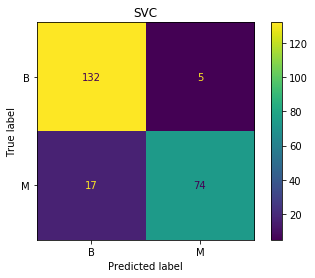

In [48]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('SVC')

In [14]:
f1_score(y_test, pred, average='weighted')

0.9021274906723824

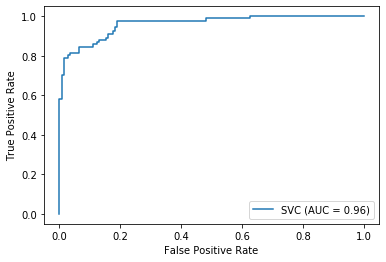

In [22]:
svc_disp = plot_roc_curve(clf, X_test, y_test)

#### random forest classifier

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)

0.9517543859649122

In [25]:
confusion_matrix(y_test, pred_rf)

array([[131,   6],
       [  5,  86]], dtype=int64)

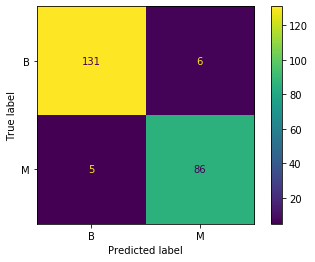

In [38]:
plot_confusion_matrix(rf, X_test, y_test) 

In [26]:
f1_score(y_test, pred_rf, average='weighted')

0.9517978426520274

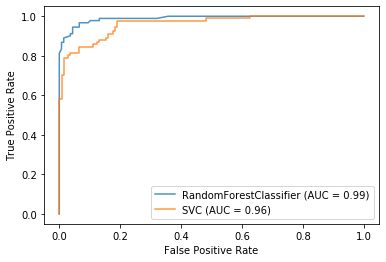

In [27]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rf, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
accuracy_score(y_test, pred_dt)

0.9210526315789473

In [30]:
confusion_matrix(y_test, pred_dt)

array([[129,   8],
       [ 10,  81]], dtype=int64)

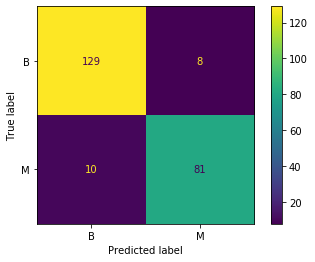

In [37]:
plot_confusion_matrix(dt, X_test, y_test) 

In [31]:
f1_score(y_test, pred_dt, average='weighted')

0.9209000762776507

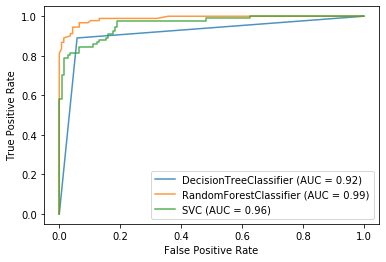

In [32]:
ax = plt.gca()
dtc_disp = plot_roc_curve(dt, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, pred_gbc)

0.956140350877193

In [44]:
confusion_matrix(y_test, pred_gbc)

array([[134,   3],
       [  7,  84]], dtype=int64)

Text(0.5, 1.0, 'Gradient Boosting Classifier')

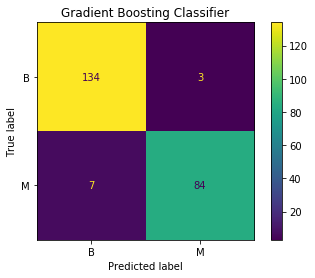

In [49]:
plot_confusion_matrix(gbc, X_test, y_test)
plt.title('Gradient Boosting Classifier')

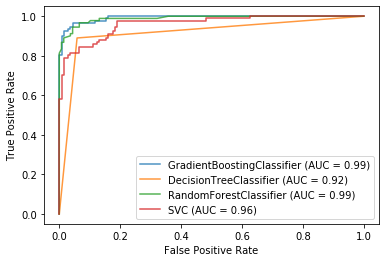

In [46]:
ax = plt.gca()
gbc_disc = plot_roc_curve(gbc, X_test, y_test, ax=ax, alpha=0.8)
dtc_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)